## Social Network Analysis

This notebook contains the code used to generate the visualizations and results of my Medium post "Predicting Friendship".

In [416]:
#importing packages
%matplotlib inline
import networkx as nx
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [417]:
#creating the graph
G = nx.Graph()

In [418]:
#adding edges
G.add_edge('Jack', 'Mike')
G.add_edge('Jack', 'Pete')
G.add_edge('Jack', 'Cindy')
G.add_edge('Cindy', 'Liz')
G.add_edge('Mike', 'Liz')
G.add_edge('Mike', 'Roger')
G.add_edge('Roger', 'Liz')
G.add_edge('Joana', 'Liz')
G.add_edge('Elle', 'Pete')
G.add_edge('Cindy', 'Mark')
G.add_edge('Steve', 'Mark')
G.add_edge('Elle', 'Steve')
G.add_edge('Steve', 'Ronald')
G.add_edge('Ronald', 'Mark')

/anaconda3/lib/python3.6/site-packages/networkx/drawing/nx_pylab.py:611: MatplotlibDeprecationWarning: isinstance(..., numbers.Number)
  if cb.is_numlike(alpha):


Text(0.89125346, -0.7, 'Ronald')

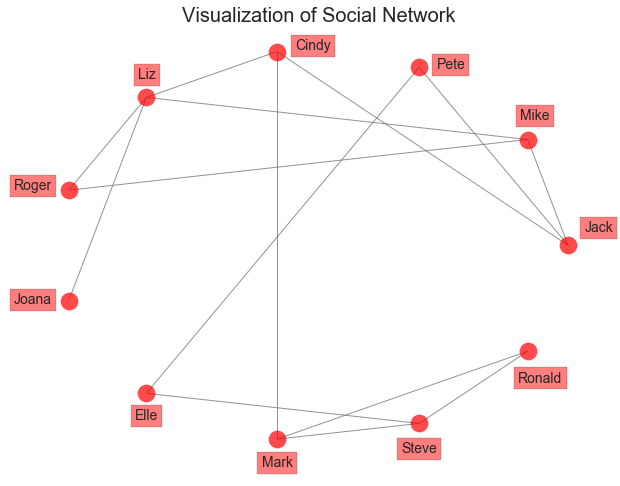

In [419]:
#first visualization
plt.figure(figsize=(10,8))
plt.title('Visualization of Social Network', fontsize=20) #adding a title
pos = nx.circular_layout(G) #specifying a circular layout
nx.draw_networkx(G, pos, alpha=0.7, with_labels=False, edge_color='.4')
plt.axis('off') #turning off the axis

#adding the name labels to the nodes
plt.text(1.12,0.07,s='Jack', fontsize=14, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
plt.text(0.87,0.64,s='Mike', fontsize=14, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
plt.text(0.54, 0.9,s='Pete', fontsize=14, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
plt.text(0, 1,s='Cindy', fontsize=14, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
plt.text(-0.654, 0.85,s='Liz', fontsize=14, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
plt.text(-1.1, 0.28173262,s='Roger', fontsize=14, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
plt.text(-1.1, -0.3,s='Joana', fontsize=14, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
plt.text(-0.65486072, -0.89,s='Elle', fontsize=14, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
plt.text(-0.14231501, -1.13,s='Mark', fontsize=14, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
plt.text(0.41541511, -1.06,s='Steve', fontsize=14, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')
plt.text(0.89125346, -0.7,s='Ronald', fontsize=14, bbox=dict(facecolor='red', alpha=0.5),horizontalalignment='center')


In [420]:
#printing some general info 
print(nx.info(G))

Name: 
Type: Graph
Number of nodes: 11
Number of edges: 14
Average degree:   2.5455


In [421]:
#creating df from graph
df = pd.DataFrame(index=G.nodes())

In [422]:
#taking a look at empty df
df

""
Jack
Mike
Pete
Cindy
Liz
Roger
Joana
Elle
Mark
Steve


In [423]:
#adding centrality characteristics of nodes
df['clustering'] = pd.Series(nx.clustering(G))
df['degree'] = pd.Series(dict(G.degree()).values())[0]
df['degree_centrality'] = pd.Series(nx.degree_centrality(G))
df['closeness'] = pd.Series(nx.closeness_centrality(G))
df['betweeness'] = pd.Series(nx.betweenness_centrality(G, normalized=True))
df['pr'] = pd.Series(nx.pagerank(G))


In [424]:
#taking a look at more specific node importance measures
df

,clustering,degree,degree_centrality,closeness,betweeness,pr
Jack,0.000000,3,0.3,0.500000,0.255556,0.103966
Mike,0.333333,3,0.3,0.434783,0.125926,0.103670
Pete,0.000000,2,0.2,0.416667,0.125926,0.075299
Cindy,0.000000,3,0.3,0.555556,0.400000,0.102197
Liz,0.166667,4,0.4,0.476190,0.329630,0.139678
Roger,1.000000,2,0.2,0.384615,0.000000,0.072691
Joana,0.000000,1,0.1,0.333333,0.000000,0.043318
Elle,0.000000,2,0.2,0.370370,0.074074,0.075776
Mark,0.333333,3,0.3,0.476190,0.274074,0.103838
Steve,0.333333,3,0.3,0.400000,0.103704,0.106371


## Calculating Scores for Link Prediction

In [425]:
cn = [(e[0], e[1], len(list(nx.common_neighbors(G,e[0], e[1])))) for e in nx.non_edges(G)]

In [426]:
len(cn)

41

In [427]:
jc = list(nx.jaccard_coefficient(G))

In [428]:
len(jc)

41

In [429]:
ra = list(nx.resource_allocation_index(G))

In [430]:
len(ra)

41

In [431]:
aa = list(nx.adamic_adar_index(G))

In [432]:
len(aa)

41

In [433]:
pa = list(nx.preferential_attachment(G))

In [434]:
len(pa)

41

In [435]:
#extracting index from score results
index = pd.Series([(e[0], e[1]) for e in cn])

In [436]:
#initializing new empty df
df = pd.DataFrame()

In [437]:
#extracting score results and transforming them into a pandas series
cn = pd.Series([(e[2]) for e in cn])
jc = pd.Series([(e[2]) for e in jc])
ra = pd.Series([(e[2]) for e in ra])
aa = pd.Series([(e[2]) for e in aa])
pa = pd.Series([(e[2]) for e in pa])

In [438]:
#adding scores to df
df['common_neigh'] = cn
df['jaccard'] = jc
df['resource_alloc'] = ra
df['adamic_adar'] = aa
df['pref_attachment'] = pa

In [439]:
#scaling scores so that mean is between 0 and 1
from sklearn.preprocessing import MinMaxScaler

In [440]:
#adding index to df
df.index = index

In [441]:
scaler = MinMaxScaler()

In [442]:
scaled_df = pd.DataFrame(scaler.fit_transform(df))
scaled_df.columns = ['common_neigh', 'jaccard', 'resource_alloc', 'adamic_adar', 'pref_attachment']

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [443]:
#taking the mean and adding it as a new column
scaled_df['mean_score'] = (scaled_df['common_neigh'] + scaled_df['jaccard'] + scaled_df['resource_alloc']\
+ scaled_df['adamic_adar'] + scaled_df['pref_attachment'])/5

In [444]:
scaled_df.index = index

In [445]:
#displaying df sorted by mean score in descending order
scaled_df.sort_values('mean_score', ascending=False)

,common_neigh,jaccard,resource_alloc,adamic_adar,pref_attachment,mean_score
"(Liz, Jack)",1.0,0.800000,1.000,1.000000,1.0,0.960000
"(Mike, Cindy)",1.0,1.000000,0.875,0.896241,0.7,0.894248
"(Steve, Pete)",0.5,0.500000,0.750,0.792481,0.4,0.588496
"(Jack, Elle)",0.5,0.500000,0.750,0.792481,0.4,0.588496
"(Liz, Mark)",0.5,0.333333,0.500,0.500000,1.0,0.566667
"(Jack, Mark)",0.5,0.400000,0.500,0.500000,0.7,0.520000
"(Cindy, Steve)",0.5,0.400000,0.500,0.500000,0.7,0.520000
"(Mark, Elle)",0.5,0.500000,0.500,0.500000,0.4,0.480000
"(Mike, Pete)",0.5,0.500000,0.500,0.500000,0.4,0.480000
"(Roger, Jack)",0.5,0.500000,0.500,0.500000,0.4,0.480000


In [446]:
#extracting first and second name from the tuple index and turning them into separate columns
first_person = []
second_person = []
for el in scaled_df.index:
    first_person.append(el[0])
    second_person.append(el[1])
    
first_person = pd.Series(first_person)
second_person = pd.Series(second_person)

scaled_df.reset_index(inplace=True)
scaled_df = pd.concat([scaled_df, first_person.rename('first_p'), second_person.rename('second_p')], axis=1)
scaled_df

,index,common_neigh,jaccard,resource_alloc,adamic_adar,pref_attachment,mean_score,first_p,second_p
0,"(Mike, Joana)",0.5,0.666667,0.375,0.396241,0.1,0.407581,Mike,Joana
1,"(Mike, Cindy)",1.0,1.000000,0.875,0.896241,0.7,0.894248,Mike,Cindy
2,"(Mike, Ronald)",0.0,0.000000,0.000,0.000000,0.4,0.080000,Mike,Ronald
3,"(Mike, Mark)",0.0,0.000000,0.000,0.000000,0.7,0.140000,Mike,Mark
4,"(Mike, Elle)",0.0,0.000000,0.000,0.000000,0.4,0.080000,Mike,Elle
5,"(Mike, Steve)",0.0,0.000000,0.000,0.000000,0.7,0.140000,Mike,Steve
6,"(Mike, Pete)",0.5,0.500000,0.500,0.500000,0.4,0.480000,Mike,Pete
7,"(Joana, Cindy)",0.5,0.666667,0.375,0.396241,0.1,0.407581,Joana,Cindy
8,"(Joana, Roger)",0.5,1.000000,0.375,0.396241,0.0,0.454248,Joana,Roger
9,"(Joana, Jack)",0.0,0.000000,0.000,0.000000,0.1,0.020000,Joana,Jack


In [447]:
#defining a function to easily look up most likely connection for every individual
def most_likely_friend(name):
    """
    Input: String of name of individual
    Output: Data Frame containing three columns: Person 1, Person 2, and the mean connection probability score 
    """
    result_df = scaled_df[(scaled_df.first_p == name) | (scaled_df.second_p == name)].sort_values('mean_score', ascending=False)
    result_df.reset_index(drop=True, inplace=True)
        
       
    result_df = result_df[['first_p','second_p', 'mean_score']]
    result_df.columns = ['Person 1', 'Person 2', 'Probability of Connection']

    return result_df
    


In [448]:
most_likely_friend('Mark')

,Person 1,Person 2,Probability of Connection
0,Liz,Mark,0.566667
1,Jack,Mark,0.520000
2,Mark,Elle,0.480000
3,Mike,Mark,0.140000
4,Roger,Mark,0.080000
5,Mark,Pete,0.080000
6,Joana,Mark,0.020000


In [449]:
#taking the community structure into account
#assigning each node to a community
G.node['Jack']['community'] = 0
G.node['Mike']['community'] = 0
G.node['Pete']['community'] = 0
G.node['Cindy']['community'] = 0
G.node['Liz']['community'] = 0
G.node['Roger']['community'] = 0
G.node['Joana']['community'] = 0
G.node['Elle']['community'] = 1
G.node['Mark']['community'] = 1
G.node['Steve']['community'] = 1
G.node['Ronald']['community'] = 1

In [450]:
#calculating the common neighbors and resource allocation score according to Soundarajan Hopcroft 
sh = list(nx.cn_soundarajan_hopcroft(G))
cra = list(nx.ra_index_soundarajan_hopcroft(G))
index2 = pd.Series([(e[0], e[1]) for e in sh])

In [451]:
#creating a data frame
df2 = pd.DataFrame() #initializing empty df

sh = pd.Series([(e[2]) for e in sh]) #extracting score from list
cra = pd.Series([(e[2]) for e in cra])

df2['sh'] = sh #adding score columns to df
df2['cra'] = cra

df2.index = index2 #adding index to df
df2

,sh,cra
"(Mike, Joana)",2,0.250000
"(Mike, Cindy)",4,0.583333
"(Mike, Ronald)",0,0.000000
"(Mike, Mark)",0,0.000000
"(Mike, Elle)",0,0.000000
"(Mike, Steve)",0,0.000000
"(Mike, Pete)",2,0.333333
"(Joana, Cindy)",2,0.250000
"(Joana, Roger)",2,0.250000
"(Joana, Jack)",0,0.000000


In [452]:
#normalizing the scores and adding an index
scaled_df2 = pd.DataFrame(scaler.fit_transform(df2))
scaled_df2.columns = ['common_neigh', 'resource_alloc']
scaled_df2.index = index2

/anaconda3/lib/python3.6/site-packages/sklearn/preprocessing/data.py:323: DataConversionWarning: Data with input dtype int64, float64 were all converted to float64 by MinMaxScaler.
  return self.partial_fit(X, y)


In [453]:
#taking the mean
scaled_df2['mean_score'] = (scaled_df2['common_neigh'] + scaled_df2['resource_alloc'])/2

In [454]:
#displaying df sorted my mean score
scaled_df2.sort_values('mean_score', ascending=False)

,common_neigh,resource_alloc,mean_score
"(Liz, Jack)",1.00,1.000,1.0000
"(Mike, Cindy)",1.00,0.875,0.9375
"(Mark, Elle)",0.50,0.500,0.5000
"(Ronald, Elle)",0.50,0.500,0.5000
"(Mike, Pete)",0.50,0.500,0.5000
"(Roger, Jack)",0.50,0.500,0.5000
"(Cindy, Pete)",0.50,0.500,0.5000
"(Mike, Joana)",0.50,0.375,0.4375
"(Joana, Cindy)",0.50,0.375,0.4375
"(Joana, Roger)",0.50,0.375,0.4375


In [455]:
#taking the names out of the index into separate columns
first_person = []
second_person = []
for el in scaled_df2.index:
    first_person.append(el[0])
    second_person.append(el[1])
    
first_person = pd.Series(first_person)
second_person = pd.Series(second_person)

scaled_df2.reset_index(inplace=True)
scaled_df2 = pd.concat([scaled_df2, first_person.rename('first_p'), second_person.rename('second_p')], axis=1)
scaled_df2

,index,common_neigh,resource_alloc,mean_score,first_p,second_p
0,"(Mike, Joana)",0.50,0.375,0.4375,Mike,Joana
1,"(Mike, Cindy)",1.00,0.875,0.9375,Mike,Cindy
2,"(Mike, Ronald)",0.00,0.000,0.0000,Mike,Ronald
3,"(Mike, Mark)",0.00,0.000,0.0000,Mike,Mark
4,"(Mike, Elle)",0.00,0.000,0.0000,Mike,Elle
5,"(Mike, Steve)",0.00,0.000,0.0000,Mike,Steve
6,"(Mike, Pete)",0.50,0.500,0.5000,Mike,Pete
7,"(Joana, Cindy)",0.50,0.375,0.4375,Joana,Cindy
8,"(Joana, Roger)",0.50,0.375,0.4375,Joana,Roger
9,"(Joana, Jack)",0.00,0.000,0.0000,Joana,Jack


In [460]:
#adapting function for second df
def most_likely_friend2(name):
     """
    Input: String of name of individual
    Output: Data Frame containing three columns: Person 1, Person 2, and the mean connection probability score 
    """
    result_df = scaled_df2[(scaled_df2.first_p == name) | (scaled_df2.second_p == name)].sort_values('mean_score', ascending=False)
    result_df.reset_index(drop=True, inplace=True)
        
       
    result_df = result_df[['first_p','second_p', 'mean_score']]
    result_df.columns = ['Person 1', 'Person 2', 'Probability of Connection']

    return result_df

IndentationError: unindent does not match any outer indentation level (<ipython-input-460-cfb33f5ea8c1>, line 7)

In [457]:
most_likely_friend2('Mark')

,Person 1,Person 2,Probability of Connection
0,Mark,Elle,0.500
1,Liz,Mark,0.125
2,Jack,Mark,0.125
3,Mike,Mark,0.000
4,Joana,Mark,0.000
5,Roger,Mark,0.000
6,Mark,Pete,0.000
